Anggota Kelompok:
1. 1301200301 - Zalfaa Putri Ayudhia
2. 1301200531 - Renaldi Mahardika Putra Mamba

==============================================================

# Tools

Install tools untuk automation, TPOT

In [1]:
!pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 1.7 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=45967f787bc7ed9d212dd02ae343ad17a701820d004c86506e4b870b87cbe8aa
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


# Library

In [2]:
# library untuk dataframe
import pandas as pd
import numpy as np

# library untuk visualisasi data
import matplotlib.pyplot as plt

# library untuk preprocessing data
from scipy import stats

# library untuk split data
from sklearn.model_selection import train_test_split

# library untuk pemodelan menggunakan TPOT
from tpot import TPOTClassifier

# library untuk evaluasi
from sklearn import metrics

# Eksplorasi dan Persiapan Data

Import data train dan test dari dataset Breast Cancer Wisconsin (Diagnostic)

In [3]:
# Import data train
!gdown --id 1EIYiRtdG2FAmnJzJRzT9r1ACqvnmXAUX

# Import data test
!gdown --id 1XlUQOv5PfaETGQ8gfSUBu-6_g56dwAYN

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EIYiRtdG2FAmnJzJRzT9r1ACqvnmXAUX
To: /content/train.csv
100% 102k/102k [00:00<00:00, 51.0MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XlUQOv5PfaETGQ8gfSUBu-6_g56dwAYN
To: /content/test.csv
100% 23.3k/23.3k [00:00<00:00, 32.5MB/s]


==============================================================

Baca data menggunakan pandas

In [4]:
# membuat dataframe train
df_train = pd.read_csv("train.csv")

# membuat dataframe test
df_test = pd.read_csv("test.csv")

In [5]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [6]:
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


==============================================================

Cek apabila ada atribut yang bertipe data object. Dapat terlihat pada data train terdapat atribut yang bertipe data object, yaitu:
1. concavity_mean
2. concave points_mean
3. concavity_se
4. concave points_se
5. concavity_worst
6. concave points_worst

In [7]:
df_train.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean              object
concave points_mean         object
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se                object
concave points_se           object
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df_test.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

==============================================================

Ubah atribut yang bertipe data object menjadi tipe data float/real (disesuaikan dengan tipe data dari atribut pada data test). Lalu cek lagi tipe data trainnya. Terlihat tipe data pada setiap atribut data train kecuali diagnosis sudah terubah.

In [9]:
df_train['concavity_mean'] = pd.to_numeric(df_train['concavity_mean'], errors='coerce')
df_train['concave points_mean'] = pd.to_numeric(df_train['concave points_mean'], errors='coerce')
df_train['concavity_se'] = pd.to_numeric(df_train['concavity_se'], errors='coerce')
df_train['concave points_se'] = pd.to_numeric(df_train['concave points_se'], errors='coerce')
df_train['concavity_worst'] = pd.to_numeric(df_train['concavity_worst'], errors='coerce')
df_train['concave points_worst'] = pd.to_numeric(df_train['concave points_worst'], errors='coerce')

In [10]:
df_train.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

==============================================================

Cek nilai-nilai dari atribut diagnosis. Dapat terlihat bahwa atribut diagnosis terdiri dari dua nilai, yaitu B dan M.

Atribut ini merupakan label untuk diagnosis kanker payudara dengan keterangan:
1. B = benign (jinak)
2. M = malignant (ganas)

Untuk itu, dilakukan konversi nilai integer agar nilai dapat terbaca dengan baik oleh komputer sebagai berikut:
1. B --> 0
2. M --> 1

Lalu cek kembali data train-nya

In [11]:
df_train['diagnosis'].value_counts()

B    275
M    188
Name: diagnosis, dtype: int64

In [12]:
diagnosis_to_number = {'B' : 0, 'M' : 1}
df_train['diagnosis'] = df_train['diagnosis'].map(diagnosis_to_number)

In [13]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df_train.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

==============================================================

Cek deskripsi dari masing-masing data.

In [15]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,463.0,3.072130e+07,1.248655e+08,8670.000000,865280.000000,897880.000000,8.910720e+06,9.112962e+08
diagnosis,463.0,4.060475e-01,4.916248e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,463.0,2.366673e+02,4.224021e+03,8.196000,11.800000,13.480000,1.615000e+01,9.000000e+04
texture_mean,463.0,1.951575e+01,8.978351e+00,9.710000,16.070000,18.770000,2.168000e+01,1.900000e+02
perimeter_mean,463.0,9.278639e+01,2.439204e+01,43.790000,75.485000,86.910000,1.064500e+02,1.885000e+02
area_mean,463.0,6.662950e+02,3.561670e+02,143.500000,427.950000,559.200000,8.041000e+02,2.501000e+03
smoothness_mean,463.0,9.634058e-02,1.369239e-02,0.062510,0.086580,0.096100,1.053500e-01,1.447000e-01
compactness_mean,463.0,1.046333e-01,5.384442e-02,0.019380,0.064130,0.092180,1.305500e-01,3.454000e-01
concavity_mean,456.0,9.261361e-02,8.118428e-02,0.000692,0.029878,0.067780,1.356000e-01,4.268000e-01
concave points_mean,456.0,5.101261e-02,3.918427e-02,0.001852,0.020688,0.035875,7.760250e-02,2.012000e-01


In [16]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,106.0,2.884536e+07,1.262798e+08,91227.000000,914071.750000,919546.000000,925544.250000,9.113205e+08
radius_mean,106.0,1.359878e+01,3.437080e+00,7.691000,11.495000,13.010000,14.855000,2.463000e+01
texture_mean,106.0,1.996783e+01,4.680723e+00,11.280000,16.590000,19.550000,22.647500,3.062000e+01
perimeter_mean,106.0,8.839887e+01,2.367094e+01,47.920000,73.907500,84.170000,96.322500,1.655000e+02
area_mean,106.0,6.050689e+02,3.296871e+02,170.400000,403.050000,525.600000,680.850000,1.841000e+03
smoothness_mean,106.0,9.644632e-02,1.565484e-02,0.052630,0.085088,0.095030,0.104875,1.634000e-01
compactness_mean,106.0,1.030640e-01,4.826571e-02,0.033980,0.067015,0.096870,0.126825,2.770000e-01
concavity_mean,106.0,7.825476e-02,7.153486e-02,0.000000,0.030793,0.052275,0.102675,3.514000e-01
concave points_mean,106.0,4.314380e-02,3.576638e-02,0.000000,0.020917,0.030680,0.053027,1.520000e-01
symmetry_mean,106.0,1.769934e-01,2.426178e-02,0.106000,0.160400,0.172450,0.191575,2.397000e-01


==============================================================

Cek apabila terdapat nilai null. Dapat terlihat bahwa data train masih memiliki nilai null. Untuk itu, dilakukan fill untuk nilai null dengan mean. Setelah itu, cek kembali data train.

In [17]:
df_train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
df_test.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [19]:
for attribute in df_train :
  df_train[attribute].fillna(df_train[attribute].mean(), inplace = True)

In [20]:
df_train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

==========================================================

Cek apakah data train memiliki outlier menggunakan boxplot

In [21]:
bplot1_mean = [df_train['radius_mean'], df_train['texture_mean'], df_train['perimeter_mean'], df_train['area_mean'], df_train['smoothness_mean']]
bplot2_mean = [df_train['compactness_mean'], df_train['concavity_mean'], df_train['concave points_mean'], df_train['symmetry_mean'], df_train['fractal_dimension_mean']]
bplot1_se = [df_train['radius_se'], df_train['texture_se'], df_train['perimeter_se'], df_train['area_se'], df_train['smoothness_se']]
bplot2_se = [df_train['compactness_se'], df_train['concavity_se'], df_train['concave points_se'], df_train['symmetry_se'], df_train['fractal_dimension_se']]
bplot1_worst = [df_train['radius_worst'], df_train['texture_worst'], df_train['perimeter_worst'], df_train['area_worst'], df_train['smoothness_worst']]
bplot2_worst = [df_train['compactness_worst'], df_train['concavity_worst'], df_train['concave points_worst'], df_train['symmetry_worst'], df_train['fractal_dimension_worst']]

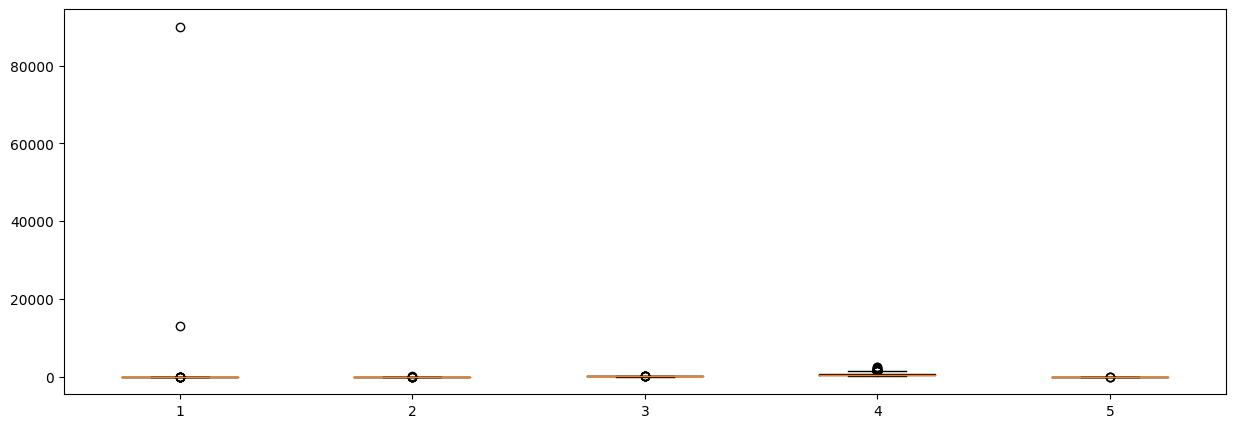

In [22]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1_mean)

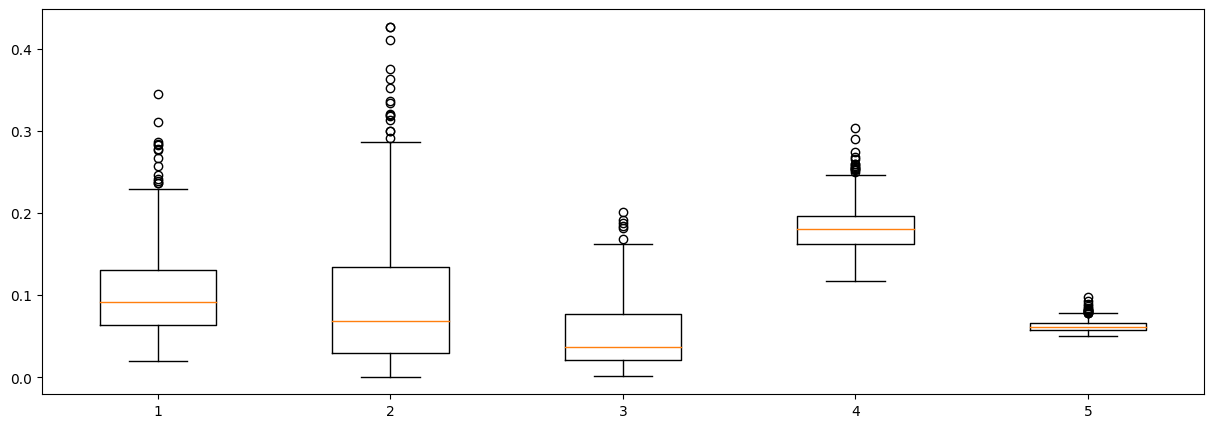

In [23]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot2_mean)

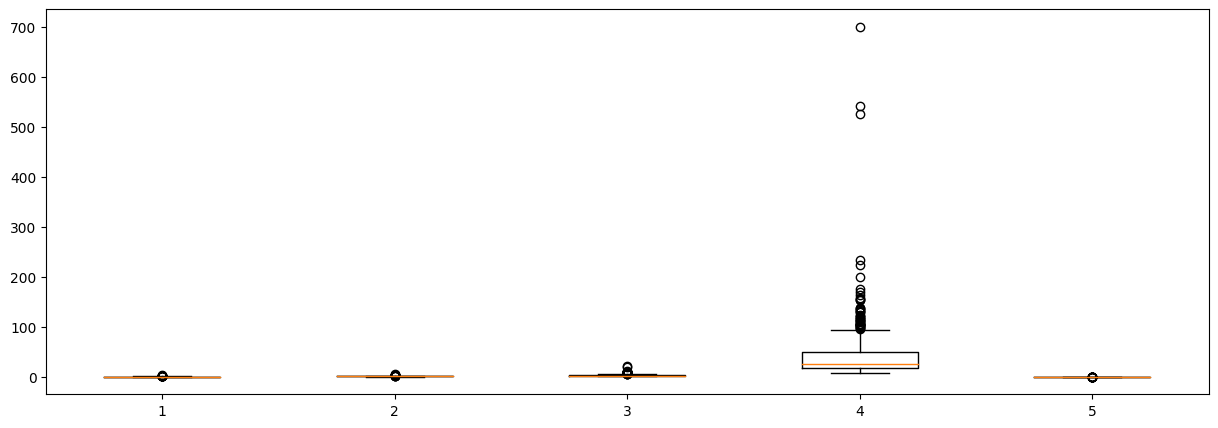

In [24]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1_se)

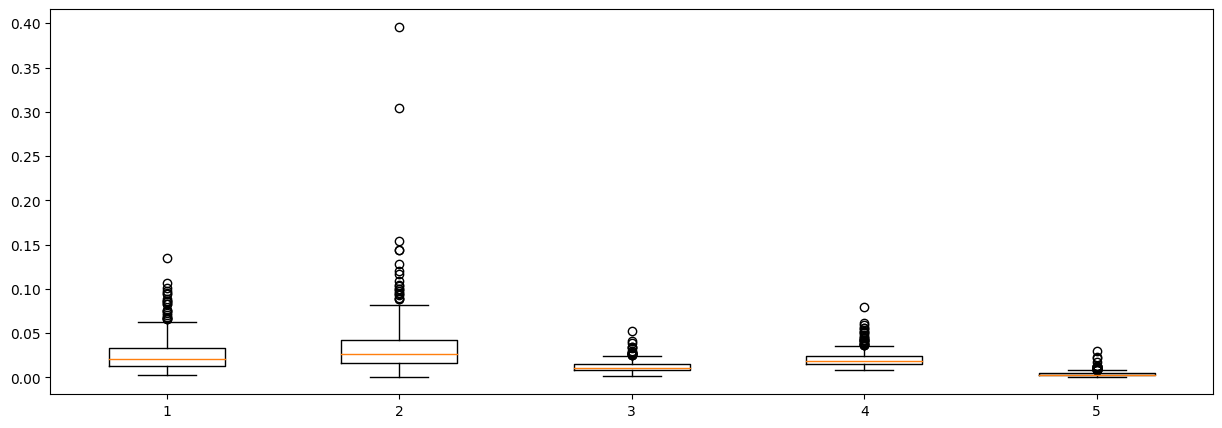

In [25]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot2_se)

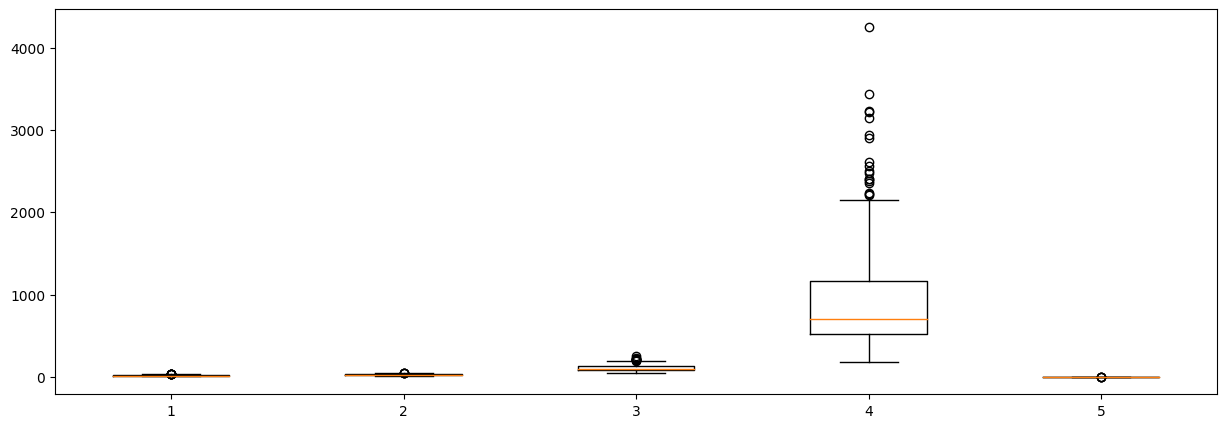

In [26]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1_worst)

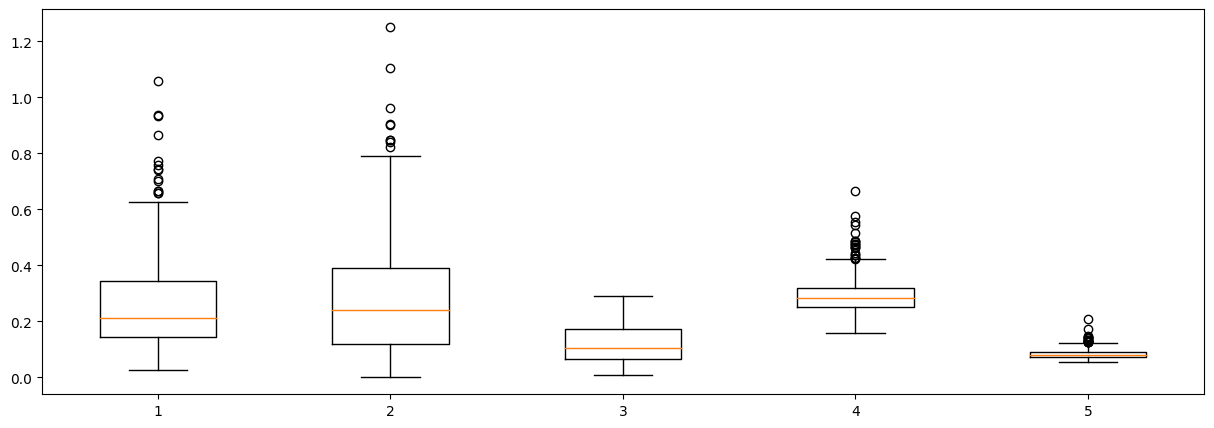

In [27]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot2_worst)

==========================================================

Cek bentuk data untuk untuk membandingkan sebelum dan setelah menghapus outlier. Dapat terlihat setelah outlier dihapus baris data berkurang.

In [28]:
# cek bentuk data sebelum outlier dihapus
df_train.shape

(463, 32)

In [29]:
# penghapusan outlier
df_train = df_train[(np.abs(stats.zscore(df_train.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [30]:
# cek bentuk data sesudah hapus outlier
df_train.shape

(397, 32)

In [31]:
df_train.to_csv('Train_preprocessed.csv')

# Eksperimen

Split data menjadi data train sebesar 80% dan data test sebesar 20% dengan random state 32 dengan atribut diagnosis yang akan diprediksi.

In [32]:
x = df_train.drop(['diagnosis'], axis = 1)
y = df_train['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

==========================================================

Membuat pemodelan menggunakan AutoML TPOT. Dapat terlihat CV Score mencapai 97,7%

In [33]:
exp = TPOTClassifier(generations=10, population_size=20, cv=5, n_jobs=2, random_state=42, verbosity=2)
exp.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9653769841269841

Generation 2 - Current best internal CV score: 0.9653769841269841

Generation 3 - Current best internal CV score: 0.9653769841269841

Generation 4 - Current best internal CV score: 0.971577380952381

Generation 5 - Current best internal CV score: 0.971577380952381

Generation 6 - Current best internal CV score: 0.971577380952381

Generation 7 - Current best internal CV score: 0.9716269841269842

Generation 8 - Current best internal CV score: 0.9716269841269842

Generation 9 - Current best internal CV score: 0.9779265873015873

Generation 10 - Current best internal CV score: 0.9779265873015873

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


TPOTClassifier(generations=10, n_jobs=2, population_size=20, random_state=42,
               verbosity=2)

==========================================================

Memprediksi diagnosis yang ada pada test

In [34]:
y_pred = exp.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

# Evaluasi

Melakukan scoring dengan metrics untuk mendapatkan akurasi dari model yang sudah dibuat. Dapat terlihat akurasi yang didapatkan mencapai 96%

In [35]:
evaluasi = []

evaluasi.append(['Eksperimen', metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred)])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.91      0.95        32

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



# Prediksi untuk dataset test

In [36]:
prediksi = exp.predict(df_test)

In [37]:
df_test['diagnosis_pred'] = prediksi
prediksi_to_str = {1 : 'M', 0 : 'B'}
df_test['diagnosis_pred'] = df_test['diagnosis_pred'].map(prediksi_to_str)
df_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_pred
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863,B
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925,B
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490,B
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,B
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
102,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
103,926954,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M
104,927241,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,M


In [38]:
df_test.to_csv('test_predicted.csv')